# Predictive Analytics: Revenue Forecasting & Profit Margin Protection
### *High-Precision Financial Modeling for Retail Operations*

## Executive Summary
This engine is designed to eliminate financial guesswork. By leveraging a **Random Forest Regressor**, we forecast transaction totals with a focus on protecting the **Gross Margin**. This allows stakeholders to synchronize inventory levels with expected revenue and optimize cash flow management across all branches.

---

In [1]:
import sys
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Define paths and inject our custom 'src' modules
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))

if BASE_PATH not in sys.path:
    sys.path.append(BASE_PATH)


# 2. Import Specialized Modules
from src.data_cleaning import load_and_clean_data
from src.model_utils import prepare_modeling_data, train_and_evaluate, plot_feature_importance

# 3. Load & Clean Pipeline
DATA_PATH = os.path.join(BASE_PATH, "data/processed/sales_with_clusters.csv")
sales_analytics = load_and_clean_data(DATA_PATH)


d:\Documentos\VsCode\projetos_git\sales-forecasting-and-performance-analytics\src\data_cleaning.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series = pd.to_datetime(df['Time'], errors='coerce')


In [2]:
# Step 1: Prepare (Returns 4 values)
X_train, X_test, y_train, y_test = prepare_modeling_data(sales_analytics)

# Step 2: Train (Returns 3 values: model, predictions, metrics_dict)
model, predictions, metrics = train_and_evaluate(X_train, X_test, y_train, y_test)

# Display Stakeholder KPIs
print(f"Model Accuracy (R²): {metrics['R2']:.4f}")
print(f"Average Prediction Error (MAE): ${metrics['MAE']:.2f}")

Model Accuracy (R²): 0.9989
Average Prediction Error (MAE): $5.56


## Business Driver Audit
The following chart identifies which variables have the most significant impact on our total revenue. This audit ensures the model is aligned with retail logic and provides actionable insights for the sales team.

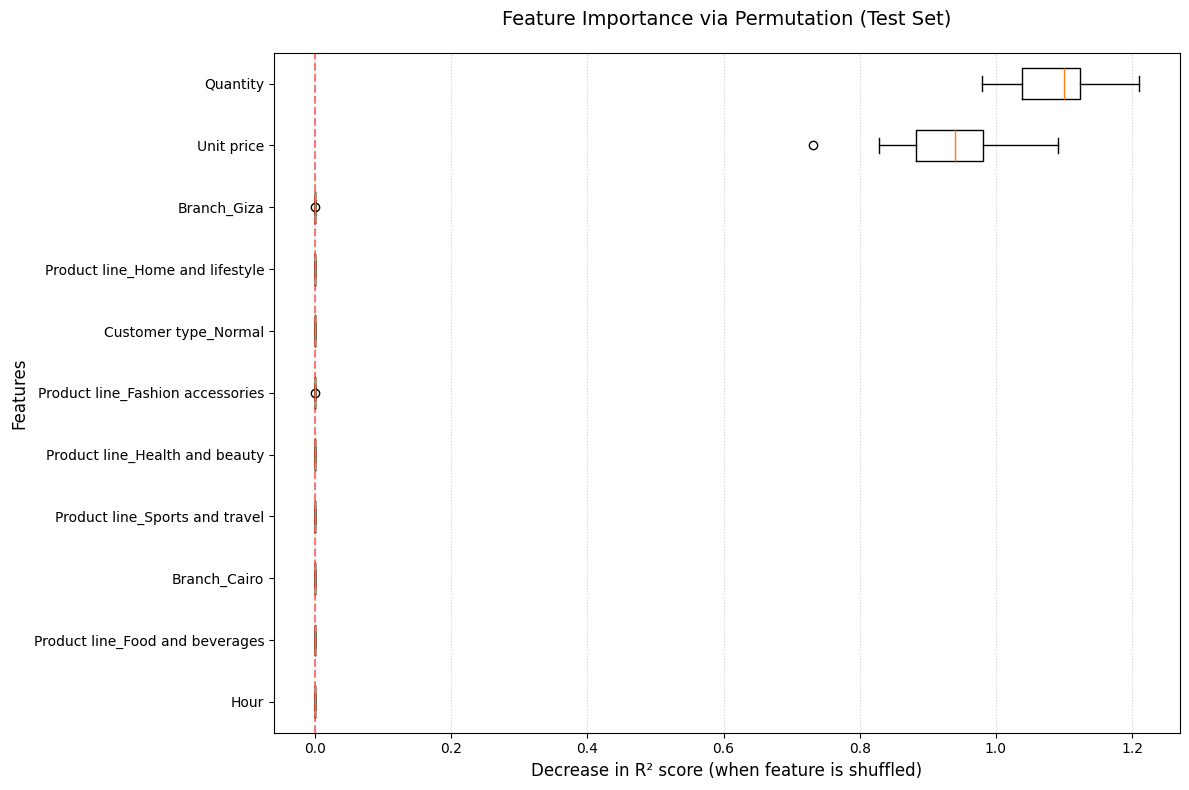

Importance plot successfully saved at: d:\Documentos\VsCode\projetos_git\sales-forecasting-and-performance-analytics\outputs/figures/feature_importance.png


{'importances_mean': array([ 9.32433517e-01,  1.08578354e+00, -2.01917628e-05, -1.03391589e-05,
         3.37051302e-05, -7.92448096e-07, -1.40252926e-06, -1.07877822e-05,
        -3.55369962e-06,  1.27261429e-05, -4.37913441e-06]),
 'importances_std': array([1.01370877e-01, 6.64943457e-02, 1.69153154e-05, 1.42996107e-05,
        3.11059140e-05, 9.26552870e-06, 1.47918463e-05, 1.36185123e-05,
        5.76203457e-06, 9.77345926e-06, 7.84010006e-06]),
 'importances': array([[ 1.09097785e+00,  9.85034404e-01,  8.27667491e-01,
          9.66507441e-01,  9.53315739e-01,  9.00191028e-01,
          9.25738304e-01,  8.76582684e-01,  1.06629241e+00,
          7.32027813e-01],
        [ 9.94457765e-01,  1.20994024e+00,  1.02682099e+00,
          1.12495361e+00,  1.13456817e+00,  1.09495363e+00,
          1.07022580e+00,  1.11833772e+00,  9.79291193e-01,
          1.10428631e+00],
        [-2.93550611e-05, -5.99611803e-06, -1.59612736e-05,
         -3.32889846e-05, -1.00735036e-05, -4.53059297e-0

In [3]:
FIG_PATH = os.path.join(BASE_PATH, "outputs/figures/feature_importance.png")
plot_feature_importance(model, X_test, y_test, output_path=FIG_PATH)

In [4]:
import joblib

# Exporting the model as a production asset
MODEL_PATH = os.path.join(BASE_PATH, "outputs/models/model_columns.pkl")
os.makedirs(os.path.dirname(MODEL_PATH), exist_ok=True)
model_columns = list(X_train.columns)
joblib.dump(model_columns, MODEL_PATH)

print(f"Model successfully deployed for production at: {MODEL_PATH}")

Model successfully deployed for production at: d:\Documentos\VsCode\projetos_git\sales-forecasting-and-performance-analytics\outputs/models/model_columns.pkl


In [5]:
import joblib
import os

# Garante que a pasta de destino exista
os.makedirs('../outputs/models', exist_ok=True)

# Exporta o modelo e as colunas
joblib.dump(model, '../outputs/models/supermarket_rf_model.pkl')
joblib.dump(X_train.columns.tolist(), '../outputs/models/model_columns.pkl')

print("Artifacts for Streamlit exported from Notebook 3!")

Artifacts for Streamlit exported from Notebook 3!


## Power BI Integration & Dashboarding

To create the final Business Intelligence tool, follow these steps in Power BI Desktop:

1. **Import Data:** Use `Get Data` -> `Text/CSV` and select the `supermarket_sales_enriched.csv` file.
2. **Create Key Metrics (DAX):**
   * `Accuracy Rate = 1 - (ABS(SUM(sales_analytics[Sales]) - SUM(sales_analytics[Predicted_Sales])) / SUM(sales_analytics[Sales]))`
   * `Total Forecasted Revenue = SUM(sales_analytics[Predicted_Sales])`
3. **Visual Strategy:**
   * **Map:** Use the `City` column to show where the revenue is coming from.
   * **Cluster Chart:** A Bar Chart showing `Sales` by `Cluster_Segment`.
   * **Prediction vs Actual:** A Line Chart showing the timeline of real Sales vs. Predicted Sales.

In [6]:
# Exporting clean data for Power BI
output_bi = os.path.join(BASE_PATH, "data/processed/bi_ready_data.csv")
sales_analytics.to_csv(output_bi, index=False)
print(f"Processed data exported for Power BI: {output_bi}")

Processed data exported for Power BI: d:\Documentos\VsCode\projetos_git\sales-forecasting-and-performance-analytics\data/processed/bi_ready_data.csv
